# Preliminaries

Import packages we will need and execute the matplotlib magic command to show graphs in the Jupyter notebook.

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd

# Anscombe's Quartet

Anscombe's Quartet data is avaialble from a number of sources.  One place is the following URL from which the data here was copied: [matplotlib Gallery](https://matplotlib.org/gallery/specialty_plots/anscombe.html).  I've copied their code (and slightly modified it) to create numpy arrays with teh quartet of data sets.

In [53]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
yI = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
yII = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
yIII = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
xIV = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
yIV = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])
I = np.array(['I']*len(x))
II = np.array(['II']*len(x))
III = np.array(['III']*len(x))
IV = np.array(['IV']*len(x))

Put the data sets, first, into four pandas DataFrames.  Subsequently, concatenate those DataFrames into one DataFrame.

In [54]:
""" Formatting functions and other formatting code"""
def border(row):
    df = row.copy()
    df[('I','x')] = 'border-left: 1px solid black'
    df[('II','x')] = 'border-left: 1px solid black'
    df[('III','x')] = 'border-left: 1px solid black'
    df[('IV','x')] = 'border-left: 1px solid black'
    df[('I','y')] = 'border-right: 1px solid black'
    df[('II','y')] = 'border-right: 1px solid black'
    df[('III','y')] = 'border-right: 1px solid black'
    df[('IV','y')] = 'border-right: 1px solid black'
    return df
    
d = dict(selector="th",
    props=[('text-align', 'center')])

""" Create the Data Frames"""
dfI = pd.DataFrame(data = np.hstack((x.reshape(len(x),1),yI.reshape((len(yI),1)))),columns=['x','y'])
dfII = pd.DataFrame(data = np.hstack((x.reshape(len(x),1),yII.reshape((len(yII),1)))),columns=['x','y'])
dfIII = pd.DataFrame(data = np.hstack((x.reshape(len(x),1),yIII.reshape((len(yIII),1)))),columns=['x','y'])
dfIV = pd.DataFrame(data = np.hstack((xIV.reshape(len(xIV),1),yIV.reshape((len(yI),1)))),columns=['x','y'])
dfDict = {'I':dfI, 'II':dfII, 'III':dfIII, 'IV':dfIV}
dfDisp = pd.concat([dfI,dfII,dfIII,dfIV],axis=1,keys=list(dfDict.keys()))

""" Display the DataFrame with formatting """
dfDisp.style.apply(border,axis=None).set_table_styles([d])

The cell below prints out descriptive statistics about the four data sets.

In [55]:
import statsmodels.api as sm

myCol = ['I','II','III','IV']
dfStats = pd.DataFrame(columns=myCol)

""" Create an empty dictionary to collect all the statistics
    The key will be the statistics label name and the value will be a ditionary with
    data for each row that will be created in a pandas DataFrame """
dictStats = {}    

""" Create dictionaries for each data row """
dictStats['X Mean'] = {col:dfDisp[(col,'x')].mean() for col in myCol}
dictStats['Y Mean'] = {col:dfDisp[(col,'y')].mean() for col in myCol}
dictStats['Y Std Dev'] = {col:dfDisp[(col,'y')].std() for col in myCol}
dictStats['Correlation'] = {col:dfDisp[(col,'x')].corr(dfDisp[(col,'y')]) for col in myCol}
dictStats['N'] = {col:len(x) for col in myCol}

""" Create empty dictionaries to put subsequent statistics in """
resultConst = {}
resultSlope = {}
resultRSquared = {}
resultBSEConst = {}
resultBSESlope = {}
resultTValueConst = {}
resultTValueSlope = {}
resultSSR = {}

""" Create the data """
for col in myCol:
    y = dfDisp[(col,'y')]
    x = dfDisp[(col,'x')]
    x = sm.add_constant(x)
    result = sm.OLS(y,x).fit()
    resultConst[col] = result.params[0]
    resultSlope[col] = result.params[1]
    resultRSquared[col] = result.rsquared
    resultBSEConst[col] = result.bse['const']
    resultBSESlope[col] = result.bse[(col,'x')]
    resultTValueConst[col] = result.tvalues[0]
    resultTValueSlope[col] = result.tvalues[1]
    resultSSR[col] = result.ssr

""" Put the data in the overall dictionary """
dictStats['Regression Intercept'] = resultConst
dictStats['Regression Slope'] = resultSlope
dictStats['R Squared'] = resultRSquared
dictStats['Std Err Intercept'] = resultBSEConst
dictStats['Std Err Slope'] = resultBSESlope
dictStats['t value Intercept'] = resultTValueConst
dictStats['t value Slope'] = resultTValueSlope
dictStats['SSR'] = resultSSR

""" Put the individual statistics dictionaries in the overall dictionary """
for k,v in dictStats.items():
    new = pd.Series(v)
    new.name = k
    dfStats = dfStats.append(new)

""" Formatting dictionary """
d = dict(selector="th",
    props=[('text-align', 'center')])

""" Display statistics DataFrame"""
dfStats.style.set_table_styles([d])

,I,II,III,IV
X Mean,9,9,9,9
Y Mean,7.50091,7.50091,7.5,7.50091
Y Std Dev,2.03157,2.03166,2.03042,2.03058
Correlation,0.816421,0.816237,0.816287,0.816521
N,11,11,11,11
Regression Intercept,3.00009,3.00091,3.00245,3.00173
Regression Slope,0.500091,0.5,0.499727,0.499909
R Squared,0.666542,0.666242,0.666324,0.666707
Std Err Intercept,1.12475,1.1253,1.12448,1.12392
Std Err Slope,0.117906,0.117964,0.117878,0.117819


The cell below uses the seaborn Python package to plot one graph for each data series using the pandas DataFrame dfPlot, which has been structured particularly for this task.

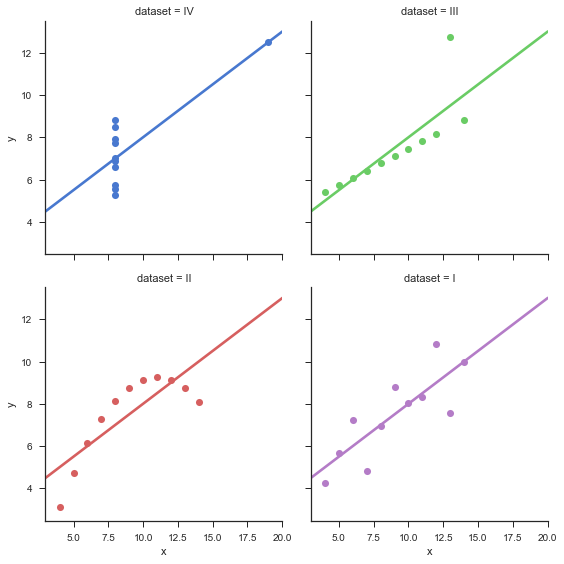

In [44]:
import seaborn as sns
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dfPlot,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

# Alternate Source of Anscome's Quartet

Anscombe's Quartet can also be uploaded from the seaborn package.

In [7]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82
